In [1]:
# First, we are gonna get the features vector from the file
import pandas as pd
import numpy as np

df = np.array(pd.read_csv('tic-tac-toe.data', sep=','))
print(df)

[['x' 'x' 'x' ... 'x' 'o' 'positive']
 ['x' 'x' 'x' ... 'o' 'x' 'positive']
 ['x' 'x' 'x' ... 'b' 'b' 'positive']
 ...
 ['o' 'x' 'o' ... 'o' 'x' 'negative']
 ['o' 'x' 'o' ... 'o' 'x' 'negative']
 ['o' 'o' 'x' ... 'x' 'x' 'negative']]


In [2]:
# Functions used during AdaBoost algorithm

# A simple stump that verifies whether the data (a single example of tic-tac-toe game)
#   has the selected victory pattern
# The indexes parameters (i1, i2, i3) always match with a victory pattern
#   (but not always with the one inside the data input!)
def stump_predictor(data, i1=0, i2=0, i3=0, symbol='b'):
    if data[i1] == symbol and data[i2] == symbol and data[i3] == symbol:
        return 1.0 if symbol == 'x' else -1.0
    return 0.0

# Calculate the sum of the weights from wrong outputs
def get_weight_error(data, indexes, stump):
    error = 0
    for key in indexes:
        h = stump_predictor(data[key], stump[0], stump[1], stump[2], stump[3])
        if (data[key][-1] == 'positive' and h != 1.0) or (data[key][-1] == 'negative' and h != -1.0):
            error+=w[key]

    return error

# Calculate alpha from error
def update_alpha(error):
    return (math.log10((1.0 - error)/error)) / 2

# Calculate new weights
def update_weights(indexes, data, stump, alpha, key_stump):
    for key in train_index:
        y = 1.0 if data[key][-1] == 'positive' else -1.0
        h = stump_predictor(data[key], stump[0], stump[1], stump[2], stump[3])
    
        w[key] = w[key] * pow(math.e, (-1)*alpha[key_stump]*h*y)

    # normalize sum to 1
    return w / sum(w)

# Predict the label summing the output of each
#   stump multiplied by its weight (alpha)
def get_final_classifier(data, stumps, alpha):
    final_classifier = 0
    for key_stump, stump in enumerate(stumps):
        final_classifier+=(alpha[key_stump]*stump_predictor(data, stump[0], stump[1], stump[2], stump[3]))

    return 'positive' if final_classifier < 0 else 'negative'

# Calculate the percentage of wrong outputs
#   from the stumps given a data
def get_error(data, stumps, alpha):
    num_rows, num_cols = data.shape
    error = 0
    for n in data:
        result = get_final_classifier(n, stumps, alpha)
        if result != n[-1]:
            error+=1

    return error / num_rows

In [3]:
# Patterns victory
stumps = [[0, 1, 2, 'x'],
          [0, 1, 2, 'o'],
          [3, 4, 5, 'x'],
          [3, 4, 5, 'o'],
          [6, 7, 8, 'x'],
          [6, 7, 8, 'o'],
          [0, 3, 6, 'x'],
          [0, 3, 6, 'o'],
          [1, 4, 7, 'x'],
          [1, 4, 7, 'o'],
          [2, 5, 8, 'x'],
          [2, 5, 8, 'o'],
          [0, 4, 8, 'x'],
          [0, 4, 8, 'o'],
          [2, 4, 6, 'x'],
          [2, 4, 6, 'o']]

In [4]:
# AdaBoost algorithm implementation
import math
from sklearn.model_selection import KFold

num_rows, num_cols = df.shape
# Each example of the data has a weight
w = np.full(num_rows, 1/num_rows)
# Each stump has a weight
alpha = np.full(len(stumps), 1.0)

loss_train = []
loss_test = []

# Go over all stumps
for key_stump, stump in enumerate(stumps):

    cross_validation = KFold(n_splits=5)
    for train_index,test_index in cross_validation.split(df):

        error = get_weight_error(df, train_index, stump)

        alpha[key_stump] = update_alpha(error)
    
        w = update_weights(train_index, df, stump, alpha, key_stump)
        
        loss_train.append(get_error(df[train_index], stumps, alpha))
        loss_test.append(get_error(df[test_index], stumps, alpha))

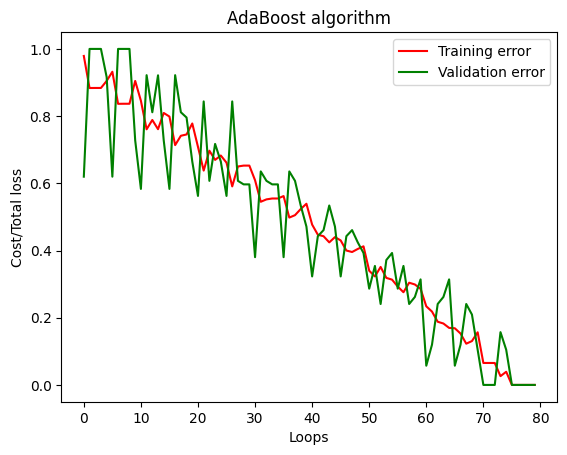

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_train, color='r', label="Training error")
plt.plot(loss_test, color='g', label="Validation error")

plt.title('AdaBoost algorithm')
plt.xlabel('Loops')
plt.ylabel('Cost/Total loss')
plt.legend(loc='upper right')
plt.show()